<a href="https://colab.research.google.com/github/JotaBlanco/CryptoAlgoTrading/blob/main/02%20-%20Features%20And%20Targets/00_Example_Variables_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables creation 
Example on creating feature and target variables.



In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set()

## 01 - Import historic data

- Here we will import diverse historic data to add to to the data we are storing in Quix

## 02 - Import data from Quix

In [13]:
token = "eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Ik1qVTBRVE01TmtJNVJqSTNOVEpFUlVSRFF6WXdRVFF4TjBSRk56SkNNekpFUWpBNFFqazBSUSJ9.eyJodHRwczovL3F1aXguYWkvb3JnX2lkIjoicnViZW5ndWlyYWRvIiwiaHR0cHM6Ly9xdWl4LmFpL293bmVyX2lkIjoiYXV0aDB8NzhkNzdkYzQtNDkwNi00YTQzLThkNGEtMjA3MDAwYTIzZTA5IiwiaHR0cHM6Ly9xdWl4LmFpL3Rva2VuX2lkIjoiYWYyYTc0ZDYtYTlkNS00NWQ1LThmMDMtNWMwZjRlM2UwODIwIiwiaHR0cHM6Ly9xdWl4LmFpL2V4cCI6IjE2NTEyNjk2MDAiLCJpc3MiOiJodHRwczovL2F1dGgucXVpeC5haS8iLCJzdWIiOiI5eGNsZGVkcmVNdURRUFhSZHJ5amdtbk96YU01MXdYS0BjbGllbnRzIiwiYXVkIjoicXVpeCIsImlhdCI6MTY0NzAwMzIzMiwiZXhwIjoxNjQ5NTk1MjMyLCJhenAiOiI5eGNsZGVkcmVNdURRUFhSZHJ5amdtbk96YU01MXdYSyIsImd0eSI6ImNsaWVudC1jcmVkZW50aWFscyIsInBlcm1pc3Npb25zIjpbXX0.b2itd0atp6C8IX9Jn68hciQgH80u5jIXW2zz55M67s2g3My9QeKpqaDbeVMcDeQo6WFCr36wMUikcgUkDCOpO7WGUqI_W9tyTUaaOZW_TBVBjgO9SyjYv59xT-QIH2Ejg7bMWB3XMS5SsXUXs7jyFVjn9-S4Sfapm7ogZGZpPNT54dBAH31JURYmj1Ygqw7ySQrGh-gkUj5j_I0Gtt0jqznUpPDeKJOa2Z3S5uwLX9zhIPaOs0cuvc40AHJBVXMfcVkVEd_Sd_Qlqj8btoZA9yoCKUFNC8mQiGQcQuJUGY1GuvQu_CdoiF-TGqSiPSePljfVfHS49bKULWsTHT3Gqg"

In [25]:
import requests
import pandas as pd
import io

url = "https://telemetry-query-rubenguirado-bitcointutorialworkspace.platform.quix.ai/data/query"
head = {'Authorization': 'Bearer {}'.format(token), 'Accept': "application/csv"}
payload = {
    'groupByTime': {'timeBucketDuration': 30000000000,'interpolationType': 'None'},
    'from': 1646916451092827000,
    'to': 1647002851092827000,
    'numericParameters': [
        {
            'parameterName': 'Bitcoin_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Ethereum_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Binance USD_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Terra_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'XRP_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Cardano_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Solana_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Avalanche_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Polkadot_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Dogecoin_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Shiba Inu_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Polygon_current_price',
            'aggregationType': 'Mean'
        }
    ],
    'stringParameters': [],
    'streamIds': [
        '50526ce7-7ee0-4f02-983b-4aa585921d15'
    ],
    'tagFilters': [],
    'eventIds': [],
    'aggregation': {
        'aggregationType': 'First',
        'interpolationType': 'None',
        'interval': 30000000000
    }
}

response = requests.post(url, headers=head, json=payload)

df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
df['Timestamp'] = [pd.to_datetime(ti) for ti in df['Timestamp']]
df.columns = ['Timestamp'] + [text_i[5:-1].split("_")[0] for text_i in df.columns[1:]]
df

,Timestamp,Bitcoin,Ethereum,Binance USD,Terra,XRP,Cardano,Solana,Avalanche,Polkadot,Dogecoin,Shiba Inu,Polygon
0,2022-03-10 12:47:30,39296.666667,2606.680000,1.001000,95.693333,0.737811,0.811748,82.603333,73.210000,17.006667,0.117046,0.000023,1.43
1,2022-03-10 12:48:00,39274.000000,2605.320000,1.001000,95.660000,0.737448,0.811177,82.570000,73.210000,17.000000,0.117046,0.000023,1.43
2,2022-03-10 12:48:30,39274.000000,2605.320000,1.001000,95.676364,0.737448,0.811346,82.579091,73.220909,17.000000,0.117034,0.000023,1.43
3,2022-03-10 12:49:00,39274.000000,2605.320000,1.001000,95.750000,0.737448,0.812109,82.620000,73.270000,17.000000,0.116980,0.000023,1.43
4,2022-03-10 12:49:30,39275.090909,2605.406364,1.001000,95.750000,0.737487,0.812109,82.620000,73.270909,17.000000,0.116980,0.000023,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2876,2022-03-11 12:45:30,40038.000000,2662.300000,1.001000,99.050000,0.746689,0.818699,83.900000,76.690000,18.370000,0.118073,0.000023,1.47
2877,2022-03-11 12:46:00,40038.000000,2661.326875,1.001000,99.050000,0.746689,0.818699,83.900000,76.690000,18.358750,0.118073,0.000023,1.47
2878,2022-03-11 12:46:30,40038.000000,2660.570000,1.001000,99.050000,0.746689,0.818699,83.900000,76.690000,18.350000,0.118073,0.000023,1.47
2879,2022-03-11 12:47:00,40020.750000,2660.570000,1.000625,98.990000,0.746285,0.818497,83.862500,76.641250,18.350000,0.118040,0.000023,1.47


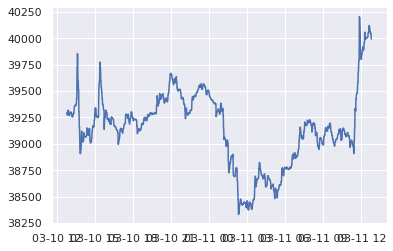

In [26]:
plt.plot(df['Timestamp'], df['Bitcoin'])
plt.show()

# 03 - Prepare data

In [27]:
# Ensure we have data with equally separated intervals
df = df.set_index('Timestamp').resample('30s').mean()
df

,Bitcoin,Ethereum,Binance USD,Terra,XRP,Cardano,Solana,Avalanche,Polkadot,Dogecoin,Shiba Inu,Polygon
Timestamp,,,,,,,,,,,,
2022-03-10 12:47:30,39296.666667,2606.680000,1.001000,95.693333,0.737811,0.811748,82.603333,73.210000,17.006667,0.117046,0.000023,1.43
2022-03-10 12:48:00,39274.000000,2605.320000,1.001000,95.660000,0.737448,0.811177,82.570000,73.210000,17.000000,0.117046,0.000023,1.43
2022-03-10 12:48:30,39274.000000,2605.320000,1.001000,95.676364,0.737448,0.811346,82.579091,73.220909,17.000000,0.117034,0.000023,1.43
2022-03-10 12:49:00,39274.000000,2605.320000,1.001000,95.750000,0.737448,0.812109,82.620000,73.270000,17.000000,0.116980,0.000023,1.43
2022-03-10 12:49:30,39275.090909,2605.406364,1.001000,95.750000,0.737487,0.812109,82.620000,73.270909,17.000000,0.116980,0.000023,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-11 12:45:30,40038.000000,2662.300000,1.001000,99.050000,0.746689,0.818699,83.900000,76.690000,18.370000,0.118073,0.000023,1.47
2022-03-11 12:46:00,40038.000000,2661.326875,1.001000,99.050000,0.746689,0.818699,83.900000,76.690000,18.358750,0.118073,0.000023,1.47
2022-03-11 12:46:30,40038.000000,2660.570000,1.001000,99.050000,0.746689,0.818699,83.900000,76.690000,18.350000,0.118073,0.000023,1.47


In [28]:
# Create one row per coint and timestamp
df = df.stack().reset_index().rename(columns={'level_1':'Crypto', 0:'Price'})
df

,Timestamp,Crypto,Price
0,2022-03-10 12:47:30,Bitcoin,39296.666667
1,2022-03-10 12:47:30,Ethereum,2606.680000
2,2022-03-10 12:47:30,Binance USD,1.001000
3,2022-03-10 12:47:30,Terra,95.693333
4,2022-03-10 12:47:30,XRP,0.737811
...,...,...,...
34567,2022-03-11 12:47:30,Avalanche,76.560000
34568,2022-03-11 12:47:30,Polkadot,18.350000
34569,2022-03-11 12:47:30,Dogecoin,0.117984
34570,2022-03-11 12:47:30,Shiba Inu,0.000023


# 04 - Create Variables

In [30]:
crypto_list = list(df['Crypto'].unique())
crypto_list

['Bitcoin',
 'Ethereum',
 'Binance USD',
 'Terra',
 'XRP',
 'Cardano',
 'Solana',
 'Avalanche',
 'Polkadot',
 'Dogecoin',
 'Shiba Inu',
 'Polygon']

In [33]:
# Moving average
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'RollAverage50'] = df.loc[filter_crypto_i, 'Price'].rolling(50, min_periods=None).mean()

df

,Timestamp,Crypto,Price,RollAverage50
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN
1,2022-03-10 12:47:30,Ethereum,2606.680000,NaN
2,2022-03-10 12:47:30,Binance USD,1.001000,NaN
3,2022-03-10 12:47:30,Terra,95.693333,NaN
4,2022-03-10 12:47:30,XRP,0.737811,NaN
...,...,...,...,...
34567,2022-03-11 12:47:30,Avalanche,76.560000,76.665410
34568,2022-03-11 12:47:30,Polkadot,18.350000,18.355956
34569,2022-03-11 12:47:30,Dogecoin,0.117984,0.118100
34570,2022-03-11 12:47:30,Shiba Inu,0.000023,0.000023


In [35]:
# Rel Moving Average
df['RelRollAverage50'] = df['RollAverage50']/df['Price']
df

,Timestamp,Crypto,Price,RollAverage50,RelRollAverage50
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN,NaN
1,2022-03-10 12:47:30,Ethereum,2606.680000,NaN,NaN
2,2022-03-10 12:47:30,Binance USD,1.001000,NaN,NaN
3,2022-03-10 12:47:30,Terra,95.693333,NaN,NaN
4,2022-03-10 12:47:30,XRP,0.737811,NaN,NaN
...,...,...,...,...,...
34567,2022-03-11 12:47:30,Avalanche,76.560000,76.665410,1.001377
34568,2022-03-11 12:47:30,Polkadot,18.350000,18.355956,1.000325
34569,2022-03-11 12:47:30,Dogecoin,0.117984,0.118100,1.000983
34570,2022-03-11 12:47:30,Shiba Inu,0.000023,0.000023,1.001613


In [36]:
# Rel Moving Average
df['LowerThanRollAverage50'] = (df['Price']<df['RollAverage50']).astype(int)
df

,Timestamp,Crypto,Price,RollAverage50,RelRollAverage50,LowerThanRollAverage50
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN,NaN,0
1,2022-03-10 12:47:30,Ethereum,2606.680000,NaN,NaN,0
2,2022-03-10 12:47:30,Binance USD,1.001000,NaN,NaN,0
3,2022-03-10 12:47:30,Terra,95.693333,NaN,NaN,0
4,2022-03-10 12:47:30,XRP,0.737811,NaN,NaN,0
...,...,...,...,...,...,...
34567,2022-03-11 12:47:30,Avalanche,76.560000,76.665410,1.001377,1
34568,2022-03-11 12:47:30,Polkadot,18.350000,18.355956,1.000325,1
34569,2022-03-11 12:47:30,Dogecoin,0.117984,0.118100,1.000983,1
34570,2022-03-11 12:47:30,Shiba Inu,0.000023,0.000023,1.001613,1


# 05 - Create Target

In [41]:
# Vela de, por ejemplo, 10 min = 20 filas de distancia
df['Timestamp'].shift(-20*len(crypto_list)) - df['Timestamp']

0       0 days 00:10:00
1       0 days 00:10:00
2       0 days 00:10:00
3       0 days 00:10:00
4       0 days 00:10:00
              ...      
34567               NaT
34568               NaT
34569               NaT
34570               NaT
34571               NaT
Name: Timestamp, Length: 34572, dtype: timedelta64[ns]

In [43]:
# Target subida 1%
df['Target_1en10min'] = ((df['Price'].shift(-20*len(crypto_list))/df['Price']) > 1.01).astype(int)
df

,Timestamp,Crypto,Price,RollAverage50,RelRollAverage50,LowerThanRollAverage50,Target_1en10min
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN,NaN,0,0
1,2022-03-10 12:47:30,Ethereum,2606.680000,NaN,NaN,0,0
2,2022-03-10 12:47:30,Binance USD,1.001000,NaN,NaN,0,0
3,2022-03-10 12:47:30,Terra,95.693333,NaN,NaN,0,0
4,2022-03-10 12:47:30,XRP,0.737811,NaN,NaN,0,0
...,...,...,...,...,...,...,...
34567,2022-03-11 12:47:30,Avalanche,76.560000,76.665410,1.001377,1,0
34568,2022-03-11 12:47:30,Polkadot,18.350000,18.355956,1.000325,1,0
34569,2022-03-11 12:47:30,Dogecoin,0.117984,0.118100,1.000983,1,0
34570,2022-03-11 12:47:30,Shiba Inu,0.000023,0.000023,1.001613,1,0


In [46]:
df['Target_1en10min'].value_counts()

0    34090
1      482
Name: Target_1en10min, dtype: int64